<a href="https://colab.research.google.com/github/ll1195831146/Infor7374-AI/blob/master/Assignment3/Assignment3_E2_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import json

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

from __future__ import absolute_import, division, print_function
keras.__version__

/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.4'

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#define decoding function
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

#display first review in words
decode_review(train_data[0])

1646592/1641221 [==============================] - 1s 1us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
#make the length of each review array as same
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls '/content/drive/My Drive'

'6210 Database Design.gdoc'	   out_data_train_1.zip
 7374Assignment3		   out_data_train.zip
 aclImdb			   out_data_val
 AED_Lab1_Part1.mp4		   out_data_val_1.zip
 AED_Lab1_Part2Final.mp4	   out_data_val.zip
 Assignment2-E1.ipynb		   resized-tiny-imagenet-200
 Assignment3.json		   resized-tiny-imagenet-200.zip
'Colab Notebooks'		   Resume0306.gdoc
 data				   RL-NikBrown.gdoc
 drive				   Track-guidelines.pdf
 Final_test.json		   val_data
 Final_train.json		   Video_Games_Sales.csv
 games.zip			  'VideoGames-Version2 2.zip'
 Imagenet32_train		   VideoGames-Version4-2.zip
'NBA_stats_f (Recovered).gsheet'   VideoGames-Version4.zip
 out_data_train			   y_val_1.npy
 out_data_train_1


In [15]:
os.chdir(os.path.join(os.getcwd(),'drive/My Drive'))
print(os.getcwd())

/content/drive/My Drive


In [0]:
import urllib.request
import tarfile

In [19]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" #download url
filepath="7374Assignment3/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
  result=urllib.request.urlretrieve(url,filepath)
  print('downloaded:',result)

downloaded: ('7374Assignment3/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x7f921b4aac50>)


In [0]:
if not os.path.exists("7374Assignment3/aclImdb"):
  tfile = tarfile.open("7374Assignment3/aclImdb_v1.tar.gz", 'r:gz')
  result=tfile.extractall('7374Assignment3/')

In [155]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in train data: 25000
Samples per class (train): [12500 12500]
Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [156]:
with open('Final_train.json') as test_f:
   test_data = json.load(test_f)

test_data = pd.DataFrame(test_data)
test_data['sentiment'] = test_data['sentiment'].str.lower()
test_data = test_data[test_data.sentiment != 'neutral']
test_data = test_data[test_data.sentiment != 'neutra;']
test_data = test_data[test_data.sentiment != 'postive']
financial_test_text = test_data['text']
financial_test_label = test_data['sentiment']

In [157]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(financial_test_label)
financila_y_test = encoder.transform(financial_test_label)

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, ngram_range=(2, 2))
x_train = vect.fit(text_train).transform(text_train)
x_test = vect.transform(text_test)
financila_x_test = vect.transform(financial_test_text)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(x_train)))
print("X_test: \n{}".format(repr(x_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 129549
X_train:
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3607330 stored elements in Compressed Sparse Row format>
X_test: 
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3392376 stored elements in Compressed Sparse Row format>
Number of features: 129549


In [160]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
financila_y_test = utils.to_categorical(financila_y_test, num_classes)

In [168]:
batch_size = 32
epochs = 5

In [169]:
from keras import optimizers
# define network
model = Sequential()
model.add(Dense(50, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

In [170]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 104s 4ms/step - loss: 0.5263 - acc: 0.8021 - val_loss: 0.3973 - val_acc: 0.8804
Epoch 2/5
25000/25000 [==============================] - 108s 4ms/step - loss: 0.2761 - acc: 0.9288 - val_loss: 0.3084 - val_acc: 0.8938
Epoch 3/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1615 - acc: 0.9671 - val_loss: 0.2753 - val_acc: 0.8977
Epoch 4/5
25000/25000 [==============================] - 105s 4ms/step - loss: 0.1002 - acc: 0.9848 - val_loss: 0.2649 - val_acc: 0.8980
Epoch 5/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.0644 - acc: 0.9920 - val_loss: 0.2649 - val_acc: 0.8974


In [171]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100) + '%')

Test Accuracy: 89.738000%


In [173]:
model_name = 'keras_BOW_E2_model_v1.h5'
model_path = os.path.join(os.getcwd(), model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/liulei/NorthEastern/7374AI/Info7374/Assignment3/keras_BOW_E2_model_v1.h5 


In [174]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[11180,  1320],
       [ 1245, 11255]])

In [183]:
y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_pred)):
    probs = y_pred[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [184]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

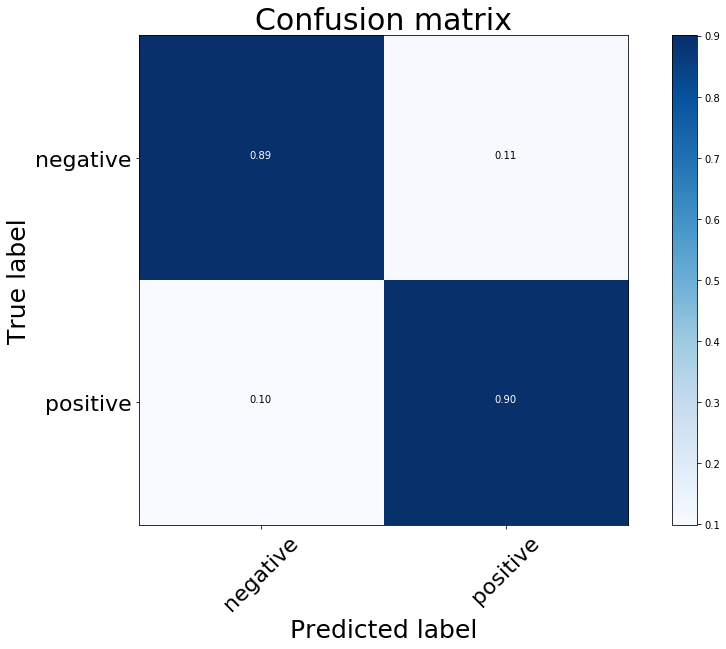

In [185]:
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(16,9))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

# Predict the sentiments for the financial dataset and get score

In [180]:
loss, acc = model.evaluate(financila_x_test, financila_y_test, verbose=0)
print('Test Accuracy on financial dataset: %f' % (acc*100) + '%')

Test Accuracy on financial dataset: 78.048780%


In [181]:
financila_y_pred = model.predict(financila_x_test)
financila_matrix = confusion_matrix(financila_y_test.argmax(axis=1), financila_y_pred.argmax(axis=1))
financila_matrix

array([[ 29,  55],
       [ 61, 388]])

In [186]:
y_test_2d = []
y_pred_2d = []

for i in range(len(financila_y_test)):
    probs = financila_y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_2d.append(one_hot_index)

for i in range(0, len(financila_y_pred)):
    probs = financila_y_pred[i]
    predicted_index = np.argmax(probs)
    y_pred_2d.append(predicted_index)

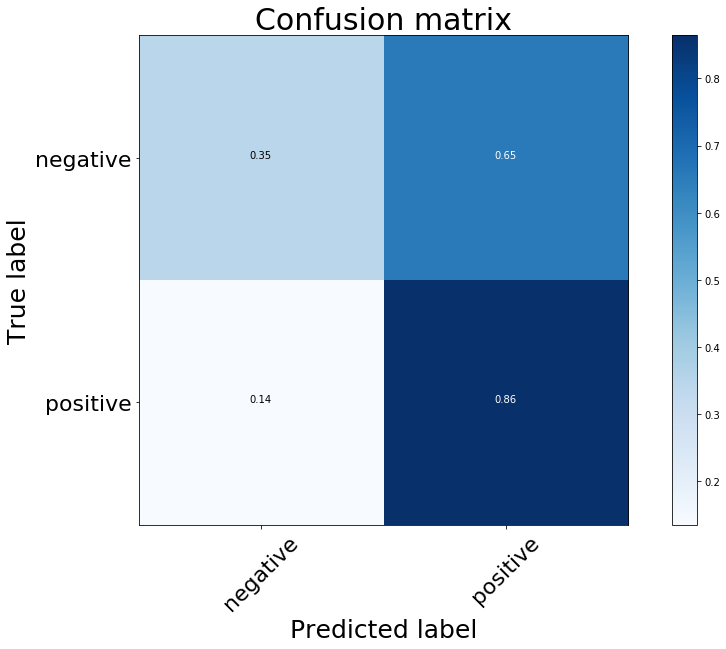

In [187]:
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test_2d, y_pred_2d)
plt.figure(figsize=(16,9))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()